# dabu, una librería de Python enfocada en la BOLSA MEXICANA DE VALORES


Hoy quiero escribirte y platicarte sobre una nueva librería de Python que se llama dabu.  El nombre dabu es la abreviatura de “datos bursátiles” y como su nombre lo indica, está enfocada en facilitar la obtención de datos burátilse de las emisoras de capitales de la BMV.  La librería es de código abierto, fue desarrollada por el autor de este texto, con el objetivo es facilitar, promover y democratizar el acceso a la información bursátil en nuestro país.  

Dabu tiene dos funciones principales:
1. Series de precios
    1. Serie de tiempo con el precio de apertura, máximo, mínimo, cierre y cierre ajustado
    1. Serie de tiempo intradía, con intervalos de 1, 2, 5, 15, 30, 60 y 90 minutos
1. Reportes trimestrales del 2017Q1 a la fecha
    1. Balance General
    1. Estado de Resultados
    1. Estado de Flujos de Efectivo

Para los reportes trimestrales, dabu toma la información de la Comisión Nacional Bancaria y de Valores y las series de precios directamente de Yahoo! Finance.

# Nuevo en Python? Sí: Continúa leyendo / No: Avanza al siguiente punto

Si eres nuevo en Python y quieres instalarlo en tu computadora, te recomiendo que lo instales utilizando el servicio de distribución anaconda (https://www.anaconda.com/products/individual).  Solo tienes que seleccionar tu sistema operativo y la versión gráfica.  Sigue las indicaciones y anaconda instalrá también las librerías más importantes de análisis de datos y machine learning.  Además instalará unas interfaces de usuario, entre ellas Jupyter Notebook y su nueva variante Jupyter Lab.  Estas interfaces de Jupyter junto con las diferentes librerías te pemiten hacer análisis de datos sin la necesidad de saber programar en Python.  Por ejemplo, este documento no tiene programación de Python, lo desarrollé en Jupyter Notebook.  Si yo pude hacerlo, tu también puedes!!!

Si te confundes con los terminos librerías, visualizadores, etc, no estás solo, yo alguna vez fuí también victima de la terminología.  Imagina que Python es un celular inteligente y las librerías son las apps que bajas a tu celular.  Sin las aplicaciones puedes usar el celular pero al momento de instalarlas, vuelves mucho más productivo al celular.  Siguiendo con la misma analogía, Jupyter sería una especie de visualizador de la aplicación para poder interactuar con los datos de la aplicación sin necesidad de recurrir a programar en Python.<br><br>

Cuando me refiera a *__Jupyter__*, *__Jupyter Notebook__* o *__Jupyter Lab__*, me estoy refiriendo a lo mismo.  Para términos prácticos *__Jupyter Lab__* es la evolución de *__Jupyter Notebook__* y puedes hacer lo mismo en uno y el otro.  Una *__libreta de Jupyter__* es un archivo creado en *__Jupyter__* donde correremos Python.

# Requisitos

Para usar dabu debes de tener Python 3.6 o mayor, al igual que pandas

# Explicaciones y detalles de los ejemplos

Cada función que veremos vendrá acompañada con un preámbulo, opciones de la función, etc.  Enseguida correré la función y de ser necesario describiré que hice y por que hice las cosas.  Esto con el objetivo de facilitar las explicaciones a las personas que no saben Python y puedan seguir los ejemplos sabiendo lo que está sucediendo paso a paso.  De antemano me disculpo con todos ustedes que saben Python y espero que para los nuevos le sea de utilidad.

# Instalar dabu

Para instalar dabu, es necesario que correr la siguiente línea desde *terminal* (Mac o Linux), o desde *chmod* (Windows):<br><br>
```pip install dabu```

#### En caso de error
Si el comdando anterior marca error, es necesario verificar que versión de Python estás utilizando:<br>
```python3 --version```<br>
Si la respuesta es 3.6 o mayor, vuelve a instalar dabu con el siguiente comando:<br>
```pip3 install dabu```

# Usar dabu

Una vez instalado dabu, es necesario habrír una libreta nueva de Jupytery y seguir los siguientes pasos:

## 1.0 Importar dabu a python

In [1]:
import dabu as db

> Antes de utilizar las diferentes librerías, las debemos de cargar a Pyhton.

## 2.0 Cargar los precios de cierre de Arca

La clase "*__dabu.Precios__*" pide como argumentos el nombre de pizarra de la emisora (inluyendo la serie, en caso de contar con ella), la fecha inicial y final (en formato 'aaaa-mm-dd').  También podemos poner más de una acción como lo veremos más adelante.<br><br>
Por lo pronto vamos a pedir los precios para Arca Contal del 1ero de enero del 2018 al 12 de febrero del 2021 y el resultado lo vamos a guardar en una variable que le llamaremos "*__ac__*"  

In [2]:
ac = db.Precios('ac', '2018-01-01', '2021-02-12').resultado

> * _Al momento de importar dabu en el paso 1.0, le pusimos el sobrenombre "*__db__*", es por eso que ponemos "**db.Precios**"._
> * _Recordar que el ticker de Arca Contal es "**ac**" y las fechas se dan de alta con el formato "**aaaa-mm-dd**"._
> * _Tanto "**ac**" como las fechas van entre comillas (muy importante)_
> * _Por útimo, al finalizar los paréntesis es necesario agregar '**.resultado**'._

Como podemos ver en la siguiente celda, al aplicarle a la variable **ac** .info, nos arroja como resultado un DataFrame de pandas y con esto podemos trabajar la información directamente en pandas.

In [3]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2018-01-02 to 2021-02-11
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Apertura         782 non-null    float64
 1   Máximo           782 non-null    float64
 2   Mínimo           782 non-null    float64
 3   Cierre           782 non-null    float64
 4   Cierre Ajustado  782 non-null    float64
dtypes: float64(5)
memory usage: 36.7 KB


> _Al aplicar **.info()** a cualquier DataFrame de Pandas, despliega una tabla con el resumen de la misma.  En nuestro caso nos indica que la tabla:_
> * _Contiene 783 entradas_
> * _Van desde el 2 de enero del 2018 al 12 de febrero del 2019 y las fechas las considera como DateTime y no como texto_
> * _Aparte del index (fechas) la table contiene 5 columnas con sus respectivos nombres, el número de datos en cada columna y el tipo de datos_

Vamos a visualizar los precios de arca que guardamos en la variable **ac**:

In [4]:
ac

,Apertura,Máximo,Mínimo,Cierre,Cierre Ajustado
Fecha,,,,,
2018-01-02,136.490005,138.380005,134.119995,138.160004,126.195755
2018-01-03,138.990005,138.990005,134.440002,134.699997,123.035370
2018-01-04,134.699997,135.289993,133.779999,133.860001,122.268127
2018-01-05,133.850006,135.820007,133.830002,134.800003,123.126724
2018-01-08,135.000000,136.000000,133.759995,134.910004,123.227203
...,...,...,...,...,...
2021-02-05,96.639999,96.750000,94.410004,94.730003,94.730003
2021-02-08,94.849998,95.000000,92.389999,93.000000,93.000000
2021-02-09,93.830002,95.800003,93.470001,95.489998,95.489998


> Cuando un DataFrame contiene más de 50 renglones, pandas despliega en automático los primeros y últimos 5 renglones e indica el tamaño de la tabla, en este caso 783 filas y 5 columnas

### 2.1 Cargar multiples emisoras:  Arca, Femsa, AmericaMóvil

Podemos importar precios de diferentes emisoras a la vez, especificando una lista con los tikcers de interés.  Por default, al importar más de una acción, se baja el precio de cierre ajustado.

In [5]:
cierre_ajustado = db.Precios(['ac', 'femsaubd', 'amxl'], '2021-02-10','2021-02-14').resultado

> A diferencia de los precios de Arca, en este ejemplo los tickers están agrupados adentro de una lista delimitados por corchetes.  Python interpreta todo lo que esté entre corchetes como una lista de datos.

In [6]:
cierre_ajustado

,AC,FEMSAUBD,AMXL
Fecha,,,
2021-02-10,93.709999,141.289993,13.80
2021-02-11,93.199997,137.429993,13.55
2021-02-12,93.099998,138.869995,13.85


### 2.2 Descargar otros precios

Para descargar el precio `Apertura`, `Máximo`, `Mínimo` o `Cierre` hay que especificarlo en el parámetro `tipo_precio`.

In [7]:
precio_max = db.Precios(['ac', 'femsaubd', 'amxl'], '2021-02-10','2021-02-14', tipo_precio='Máximo').resultado

In [8]:
precio_max

,AC,FEMSAUBD,AMXL
Fecha,,,
2021-02-10,95.519997,142.910004,14.33
2021-02-11,94.690002,141.699997,13.83
2021-02-12,93.959999,139.750000,13.90


In [9]:
precio_min = db.Precios(['ac', 'femsaubd', 'amxl'], '2021-02-10','2021-02-14', tipo_precio='Mínimo').resultado

In [10]:
precio_min

,AC,FEMSAUBD,AMXL
Fecha,,,
2021-02-10,93.309998,139.850006,13.76
2021-02-11,92.910004,136.210007,13.50
2021-02-12,92.949997,137.440002,13.50


## 3.0 Cargar precios intradía de Walmex

Los precios intradía contienen algunas restricciones por parte de Yahoo! Finance.  En los intervalor de `1m`, Yahoo solo guarda los precios de los últimos 29 días, y de esos solo se pueden consultar por rango de 10 dias.  La clase Intradia es muy similar a la clase de Precios

In [11]:
walmex_1m = db.Intradia('walmex', '2021-02-10','2021-02-14').resultado

In [12]:
walmex_1m

,Apertura,Máximo,Mínimo,Cierre
Fecha/Hora,,,,
2021-02-10 08:30:00,62.270000,62.340000,62.240002,62.240002
2021-02-10 08:31:00,62.240002,62.240002,62.240002,62.240002
2021-02-10 08:32:00,62.220001,62.220001,62.220001,62.220001
2021-02-10 08:33:00,62.240002,62.240002,62.240002,62.240002
2021-02-10 08:34:00,62.240002,62.240002,62.150002,62.160000
...,...,...,...,...
2021-02-12 14:55:00,60.889999,60.889999,60.840000,60.869999
2021-02-12 14:56:00,60.880001,60.880001,60.869999,60.869999
2021-02-12 14:57:00,60.869999,60.880001,60.869999,60.880001


In [13]:
walmex_1m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1170 entries, 2021-02-10 08:30:00 to 2021-02-12 14:59:00
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Apertura  1156 non-null   float64
 1   Máximo    1156 non-null   float64
 2   Mínimo    1156 non-null   float64
 3   Cierre    1156 non-null   float64
dtypes: float64(4)
memory usage: 45.7 KB


### 3.1 Otros rangos

Podemos cargar los precios intradías con los siguientes rangos:  `2m`, `5m`, `30m`, `60m` y `90m`, modificando el parámetro `intervalo`.  Vamos a cargar con rango de `30m`:

In [14]:
walmex_30m = db.Intradia('walmex', '2021-02-10','2021-02-14', intervalo='30m').resultado

In [15]:
walmex_30m

,Apertura,Máximo,Mínimo,Cierre
Fecha/Hora,,,,
2021-02-10 08:30:00,62.270000,62.340000,61.689999,62.060001
2021-02-10 09:00:00,62.060001,62.169998,61.660000,61.990002
2021-02-10 09:30:00,61.970001,62.000000,61.799999,61.889999
2021-02-10 10:00:00,61.820000,61.970001,61.730000,61.830002
2021-02-10 10:30:00,61.820000,61.919998,61.740002,61.770000
2021-02-10 11:00:00,61.750000,61.860001,61.639999,61.779999
2021-02-10 11:30:00,61.779999,61.790001,61.669998,61.680000
2021-02-10 12:00:00,61.680000,61.840000,61.669998,61.680000
2021-02-10 12:30:00,61.680000,61.779999,61.330002,61.360001


# 4.0 Estados Financieros

Para trabajar con los estados financieros, es necesario crear primero una instancia y darle cualquier nombre.  En este caso vamos a llamarla __*estados_financieros*__:

In [16]:
estados_financieros = db.Reportes()

Ya con la instancia creada, ahora si podemos cargar los diferentes estados financieros de las emisoras de capitales de la BMV.

## Balance General

Vamos a cargar los balances generales de Cemex, del 2017Q1 al 2020Q3.  Esto lo podemos hacer de dos maneras, la primera es escribir en una lista todas las fechas de final del trimestre de cada uno de los trimestres y la segunda es crear un rango de trimestres donde adentro de una lista definimos cualquier fecha dentro del Q inicial y final y ponemos el argumento **_rango=True_** para indicarle a dabu que se trata de un rango de fechas

In [17]:
cemex_balance = estados_financieros.balance('cemex', ['2017-01-01','2020-09-30'], rango = True)

> A La instancia *__estados_financieros__* le aplicamos el método *__balance__* para accesar a los balances generales de la empresa de interés en las fechas de interés

In [18]:
cemex_balance

,2017-03-31,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30
Efectivo y equivalentes,8138.30,7577.190,8203.17,13741.00,5731.79,6140.550,5699.15,6067.600,300.941,304.222,299.078,787.891,1386.580,2831.770,3453.180
Cuentas por cobrar,34492.80,35119.900,34917.10,33921.90,34585.60,39477.200,36996.10,34951.900,1907.710,2015.730,1926.610,1823.140,1794.740,1763.250,2000.870
Impuestos por recuperar,0.00,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Otros activos financieros,5861.00,5165.940,3209.97,3472.05,4501.66,5627.110,3945.19,2892.180,211.385,190.636,151.890,139.572,265.348,244.626,192.647
Inventarios,18642.40,18307.600,18092.70,18852.30,18636.20,20323.700,19870.60,21247.600,1114.270,1089.140,1016.550,989.028,971.315,929.020,934.195
Activos biológicos,0.00,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Otros activos no financieros,0.00,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Activos circulantes distintos de los activos no circulantes o grupo de activos para su disposición clasificados como mantenidos para la venta,67134.60,66170.600,64422.80,69987.30,63455.20,71568.600,66511.10,65159.200,3534.300,3599.720,3394.130,3739.630,4417.980,5768.660,6580.890
Activos mantenidos para venta,11411.30,4483.150,1542.73,1378.02,1423.46,1907.760,1829.07,2100.600,298.207,236.848,189.467,839.113,359.048,355.788,147.311
Total de activos circulantes,78545.90,70653.800,65965.60,71365.30,64878.70,73476.300,68340.20,67259.900,3832.510,3836.570,3583.590,4578.740,4777.030,6124.450,6728.200


## Estado de Resultados

De manera muy similar a la anterior, podemos importar el estado de resultados, aplicándo el método *__resultados__* al la instancia *__estados_financieros__*:

In [35]:
cemex_resultados = estados_financieros.resultados('cemex', ['2017-01-01','2020-12-31'], rango = True)

In [36]:
cemex_resultados

,2017-03-31,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31
Ingresos,62387.000,66275.700,63812.400,65536.200,62810.500,74232.100,70528.500,69454.400,3238.120,3523.070,3494.090,3258.670,3085.270,2911.550,3436.220,3537.460
Costo de ventas,42309.000,43227.000,41066.100,42865.500,42860.800,48272.400,45891.900,46094.000,2238.800,2352.340,2307.460,2223.190,2119.720,1979.450,2260.030,2432.370
Utilidad bruta,20078.000,23048.700,22746.300,22670.700,19949.700,25959.600,24636.600,23360.400,999.320,1170.730,1186.630,1035.480,965.546,932.100,1176.180,1105.080
Gasto de venta,1684.260,1682.120,1463.790,1603.410,1549.450,1520.800,1631.460,1618.300,88.802,92.564,104.265,94.843,86.258,82.149,78.491,89.843
Gastos de administración,11408.900,12507.600,12399.000,13211.200,12228.700,14606.700,13776.200,13775.700,616.539,701.317,673.120,658.496,618.856,571.198,645.007,663.816
Otros ingresos,2785.110,0.000,0.000,0.000,32.638,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Otros gastos,0.000,176.749,1225.040,5191.850,0.000,696.181,898.868,4276.170,52.605,34.291,44.833,215.548,42.746,69.776,1635.690,30.647
Utilidad de operación,9769.950,8682.250,7658.530,2664.280,6204.190,9135.930,8330.100,3690.210,241.374,342.562,364.415,66.598,217.686,208.977,-1183.000,320.778
Ingresos financieros,2038.610,222.602,2348.120,1717.240,715.915,2576.570,93.993,371.856,16.165,5.531,8.077,4.955,56.647,30.454,3.681,8.385
Costos financieros,6905.160,5682.200,4997.360,4427.070,5228.190,3351.190,3605.580,4074.580,204.096,203.052,186.723,222.854,212.177,194.498,302.913,277.101


## Flujos de efectivo

Y para los flujos de efectivos solamente debemos de hacer lo siguiente:

In [21]:
cemex_flujos = estados_financieros.flujos('cemex', ['2017-01-01','2020-09-30'], rango = True)

In [22]:
cemex_flujos

,2017-03-31,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30
Impuestos a la utilidad,900.175,-810.639,-1310.85,520.187,983.237,1943.190,3542.84,4466.690,61.932,115.174,151.165,161.721,50.027,89.844,70.492
Utilidad de operaciones discontinuadas,3016.500,3553.140,3502.51,3499.350,0.000,1.069,228.57,211.832,61.413,121.471,148.114,87.369,30.188,-25.125,-105.217
Utilidad neta,7061.040,12655.500,18315.70,16637.800,739.844,8332.850,11941.20,11255.000,54.134,218.023,410.410,178.595,47.232,5.608,-1519.530
"Ingresos y gastos financieros, neto",0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Gastos de depreciación y amortización,4126.500,8145.380,11881.90,15991.700,3766.050,7856.410,11869.00,16070.200,267.860,532.295,803.572,1045.420,273.365,548.600,824.171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLUJOS DE EFECTIVO NETOS PROCEDENTES DE ACTIVIDADES DE FINANCIAMIENTO,-20398.400,-32380.100,-44958.30,-52606.700,-6354.230,-13123.500,-19878.10,-28631.900,-157.915,-580.172,-884.489,-1209.910,193.447,1374.290,1176.530
"Incremento neto de efectivo y equivalentes, antes del efecto de los cambios en la tasa de cambio",-3417.100,-4038.810,-3412.83,2125.010,-8009.220,-7600.450,-8041.85,-7673.400,-7.843,-4.562,-9.706,479.107,598.693,2043.870,2665.290
Efectos de la variación en la tasa de cambio sobre el efectivo y equivalentes al efectivo,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
INCREMENTO NETO DE EFECTIVO Y EQUIVALENTES,-3417.100,-4038.810,-3412.83,2125.010,-8009.220,-7600.450,-8041.85,-7673.400,-7.843,-4.562,-9.706,479.107,598.693,2043.870,2665.290


## Fechas específicas

Si nos interesan trimestres específicos, por ejemplo para comparar un mismo trimestre vs otros años, ingresamos las fecha del último día del trimestre en el órden que nos interesa y omitimos el parámetro *__rango__*, puesto que por default es *__False__*

In [23]:
asur = estados_financieros.resultados('asur', ['2020-03-31', '2019-03-31', '2018-03-31', '2017-03-31'])

In [24]:
asur

,2020-03-31,2019-03-31,2018-03-31,2017-03-31
Ingresos,4157.000,4101.350,3916.570,2476.750
Costo de ventas,88.323,85.329,77.123,56.474
Utilidad bruta,4068.670,4016.020,3839.450,2420.270
Gastos de administración,1928.300,1840.650,1642.050,788.032
Otros ingresos,123.741,41.444,0.000,0.000
Utilidad de operación,2264.120,2216.820,2197.400,1632.240
Ingresos financieros,617.854,111.159,115.162,54.539
Costos financieros,270.670,302.503,311.507,34.141
Utilidad (pérdida) antes de impuestos,2611.300,2025.470,2001.060,1721.480
Impuestos a utilidad,646.366,506.322,533.973,382.839


## Comparar estado de resultados entre varias empresas

Podemos comparar varias emisoras en un mismo estado financiero utilizando la clase *__comparar__*.  En ella especificas el estado financiero a comparar, la fecha de comparación y una lista con las emisoras a comparar.

Vamos ha hacer una comparativa del estado de resultados con cadenas de supermercados

In [25]:
supers_resultados = estados_financieros.comparar('resultados', '2020-09-30', ['CHDRAUI', 'SORIANA', 'WALMEX'])

In [26]:
supers_resultados

,CHDRAUI,SORIANA,WALMEX
Ingresos,35411.600,37699.300,165386.000
Costo de ventas,27264.000,29705.200,126290.000
Utilidad bruta,8147.600,7994.100,39095.400
Gasto de venta,6408.420,6211.820,0.000
Gastos de administración,0.000,0.000,25448.500
Otros ingresos,1.760,56.570,224.120
Otros gastos,47.222,23.711,87.656
Utilidad de operación,1693.710,1815.140,13783.400
Ingresos financieros,47.671,74.200,616.519
Costos financieros,796.833,775.064,2063.320


Hasta aquí las funcionalidades de la versión dabu 0.1.3.  Esta misma versión cuenta con las mismas funcionalidades pero en inglés.

Esto es solo el inicio, ya obtuvimos la información de una manera super práctica y rápida.  El siguiente paso es analizarla, calular retornos diarios, razones financieras, comparar, etc. Todo esto lo desarrollaremos en versiones futuras de dabu, pero de mientras puedes utilizar toda las funcionalidades de pandas en lo que hicimos.

## Algunos comandos de la librería Pandas

### Importar pandas

In [27]:
import pandas as pd

### Calcular margen utilidad neta en el DataFrame super_resultados utilizando ".loc"

.loc te permite tomar todos los valores de una fila o index, en este caso 'UTILIDAD NETA CONSOLIDADA' y dividirlo entre otra fila index 'Ingresos' y el resultado lo guardaremos en la variable *__utilidad_neta__*

In [28]:
utilidad_neta = supers_resultados.loc['UTILIDAD NETA CONSOLIDADA'] / supers_resultados.loc['Ingresos']

In [29]:
utilidad_neta

CHDRAUI    0.018072
SORIANA    0.015163
WALMEX     0.055458
dtype: float64

Para accesar el valor de Walmex lo hacemos de la siguiente manera:

In [30]:
utilidad_neta['WALMEX']

0.05545832174428308

### Guardar el comparativo supermercados a un archivo de Excel:

Es muy fácil guardar un DataFrame en un archivo de excel.  Vamos a guardar el comparativo de los supermercados en un archivo de excel que llamaremos 'supermercados.xlsx' y a la hoja le llamaremos 'Estado de Resultados'.

In [31]:
supers_resultados.to_excel('supermercados.xlsx', sheet_name = 'Estado de Resultados')

Pandas guarda el archivo de excel en la misma ubicación de donde se encuentra la libreta.

### Guardar el balance general, estado de resultados, flujos de efectivo de Cemex a un archivo de Excel

También podemos guardar varios DataFrames en un mismo archivo.  En este ejemplo vamos a guardar los tres estados financieros de Cemex en un solo archivo de excel.  La manera de hacerlo es diferente pero fácil:

In [32]:
with pd.ExcelWriter('cemex.xlsx') as writer:  
    cemex_balance.to_excel(writer, sheet_name='Balance General')
    cemex_resultados.to_excel(writer, sheet_name='Estado de Resultados')
    cemex_flujos.to_excel(writer, sheet_name='Estado de Flujos Efectivos')

### Graficar dataframes

Podemos hacer gráficas muy sencillas

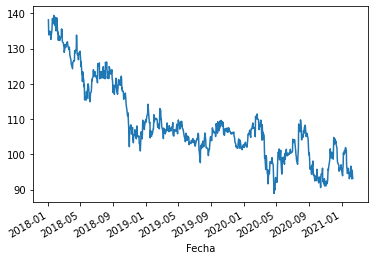

In [33]:
ac['Cierre'].plot();

O un poco más complejas con poca programación:

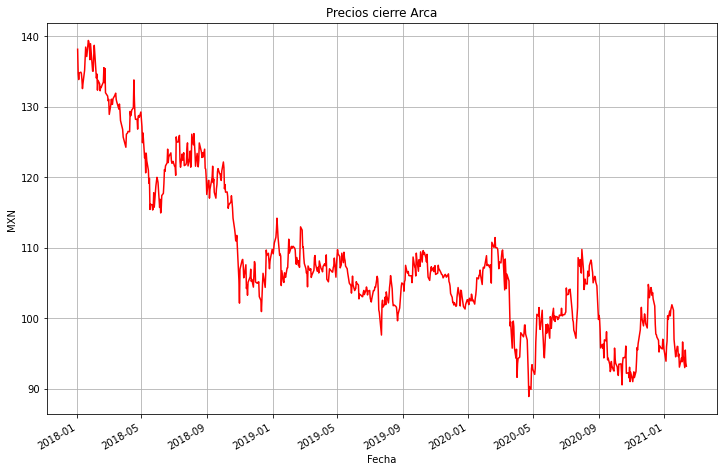

In [34]:
ac['Cierre'].plot(figsize=(12,8), title='Precios cierre Arca', xlabel='Fecha', ylabel='MXN',grid=True, color='red');

Consulta el código de la librería en https://github.com/dabu-io/dabu-dev<br>
Encontraste un bug en el código? Tienes una sugerencia? Ingrésala en https://github.com/dabu-io/dabu-dev/issues/new<br>
Visita www.dabu.io<br>
Carlos Crespo, carlos@dabu.io, @dabu_io<br>